
# Segmentação de Imagens usando OpenCV

Objetivo: Aplicar técnicas de segmentação de imagens usando limiarização, detecção de
contornos e segmentação por cor para identificar objetos presentes na imagem.



In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os


# Criando pasta para salvar resultados

In [4]:
os.makedirs("resultados", exist_ok=True)

# Carregar e Exibir a Imagem

In [5]:
imagem_original = cv2.imread("./imgs/coins.png", cv2.IMREAD_UNCHANGED)


# Se a imagem for PNG com transparência, converter o fundo para branco

In [6]:
if imagem_original.shape[-1] == 4:
    fundo_branco = np.ones_like(imagem_original[:, :, :3], dtype=np.uint8) * 255
    alpha = imagem_original[:, :, 3] / 255.0
    imagem_original = (imagem_original[:, :, :3] * alpha[..., None] + fundo_branco * (1 - alpha[..., None])).astype(np.uint8)

imagem_cinza = cv2.cvtColor(imagem_original, cv2.COLOR_BGR2GRAY)


# Exibir imagens lado a lado

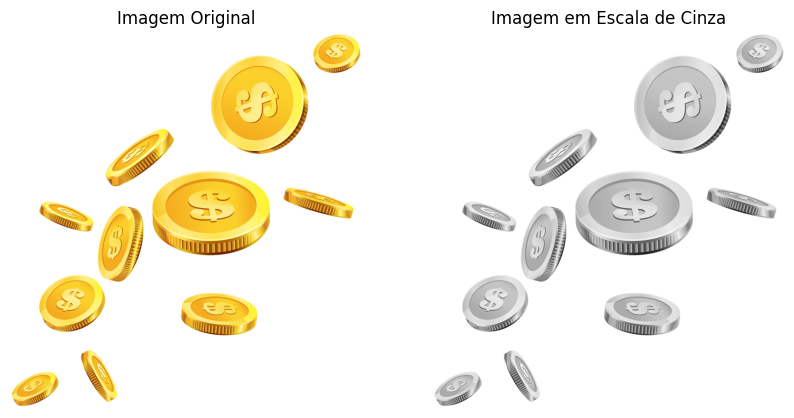

'A limiarização automática ajuda a separar objetos do fundo, facilitando a segmentação.'

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(cv2.cvtColor(imagem_original, cv2.COLOR_BGR2RGB))
axs[0].set_title("Imagem Original")
axs[0].axis("off")

axs[1].imshow(imagem_cinza, cmap="gray")
axs[1].set_title("Imagem em Escala de Cinza")
axs[1].axis("off")

plt.show()
cv2.imwrite("resultados/imagem_cinza.jpg", imagem_cinza)

"""A limiarização automática ajuda a separar objetos do fundo, facilitando a segmentação."""


# Aplicar Limiarização (Thresholding)

1. **Função da limiarização automática**:  
   A limiarização automática converte uma imagem em tons de cinza em uma imagem binária, separando os pixels em duas classes (por exemplo, fundo e objeto) com base em um limiar calculado automaticamente. Isso facilita a segmentação de objetos na imagem.
> A diferença entre limiarização simples e Otsu é que Otsu calcula automaticamente o melhor limiar.


2. **Diferença entre limiarização simples e limiarização por Otsu**:  
   - **Limiarização simples**: Utiliza um valor de limiar fixo definido pelo usuário para separar os pixels.  
   - **Limiarização por Otsu**: Calcula automaticamente o melhor limiar baseado no histograma da imagem, minimizando a variância dentro das classes. É útil quando a imagem tem uma distribuição bimodal de intensidade.

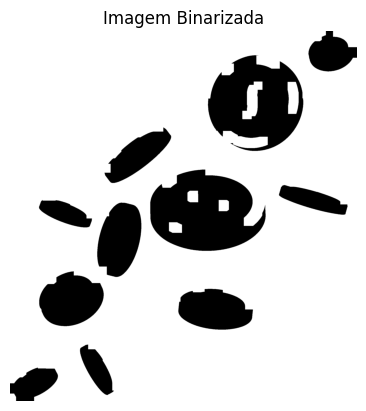

True

In [8]:
_, imagem_binarizada = cv2.threshold(imagem_cinza, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

kernel = np.ones((50, 50), np.uint8)
## APLIQIEO o filtro de abertura pra melhorar a vizulisaçao da imagem
imagem_filtro_aplicado = cv2.morphologyEx(imagem_binarizada, cv2.MORPH_OPEN, kernel)

plt.imshow(imagem_filtro_aplicado, cmap="gray")
plt.title("Imagem Binarizada")
plt.axis("off")
plt.show()
cv2.imwrite("resultados/imagem_binarizada.jpg", imagem_binarizada)



# Detectar e Desenhar Contornos

3. **Papel da função `cv2.findContours()` na segmentação**:  
   A função `cv2.findContours()` detecta os contornos dos objetos em uma imagem binária. Os contornos são representados como uma lista de pontos que delimitam as bordas dos objetos, permitindo a extração de suas formas e características.


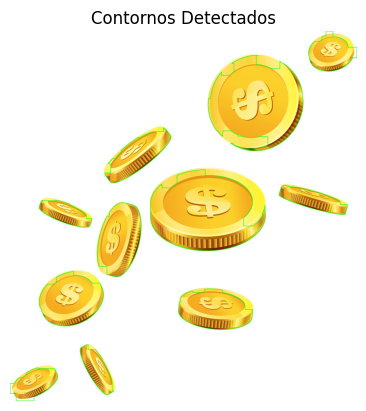

'\nA função cv2.findContours() encontra os contornos dos objetos na imagem binarizada.\nNúmero de objetos detectados: 11'

In [9]:
imagem_filtro_aplicado = cv2.bitwise_not(imagem_filtro_aplicado)
contornos, _ = cv2.findContours(imagem_filtro_aplicado, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
imagem_contornos = imagem_original.copy()
cv2.drawContours(imagem_contornos, contornos, -1, (0, 255, 0), 2)

plt.imshow(cv2.cvtColor(imagem_contornos, cv2.COLOR_BGR2RGB))
plt.title("Contornos Detectados")
plt.axis("off")
plt.show()
cv2.imwrite("resultados/imagem_contornos.jpg", imagem_contornos)

num_objetos = len(contornos)

"""
A função cv2.findContours() encontra os contornos dos objetos na imagem binarizada.
Número de objetos detectados: {}""".format(num_objetos)

4. **Número de objetos detectados na imagem**:  
`11`


# Segmentação por Cor (Desafio Opcional)

In [10]:
imagem_hsv = cv2.cvtColor(imagem_original, cv2.COLOR_BGR2HSV)

# Definir intervalo de cor para segmentação (exemplo: amarelo)

5. **Vantagens da segmentação por cor no espaço HSV**:  
   - **Separação mais eficiente das cores**: O espaço HSV separa melhor tonalidade (H), saturação (S) e valor (V), facilitando a segmentação.  
   - **Resistência a variações de iluminação**: O canal H (tonalidade) é menos afetado por mudanças de iluminação do que os canais RGB.  
   - **Facilidade na filtragem de cores específicas**: A segmentação por cor é mais precisa e flexível, permitindo a definição de intervalos de cores com mais eficiência.

> A segmentação no espaço HSV permite uma identificação mais precisa de cores.

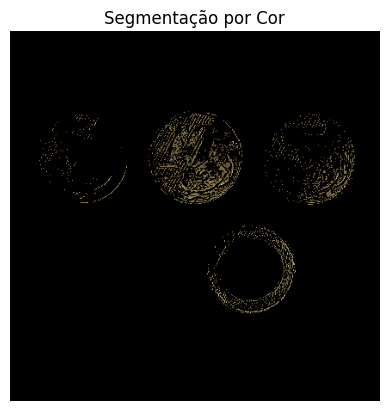

True

In [13]:
imagem_moedas_2 = cv2.imread("./imgs/coins.jpg")

imagem_hsv = cv2.cvtColor(imagem_moedas_2, cv2.COLOR_BGR2HSV)


limite_inferior = np.array([20, 100, 100])
limite_superior = np.array([30, 255, 255])

mascara = cv2.inRange(imagem_hsv, limite_inferior, limite_superior)
resultado_segmentacao = cv2.bitwise_and(imagem_moedas_2, imagem_moedas_2, mask=mascara)

plt.imshow(cv2.cvtColor(resultado_segmentacao, cv2.COLOR_BGR2RGB))
plt.title("Segmentação por Cor")
plt.axis("off")
plt.show()
cv2.imwrite("resultados/imagem_segmentada.jpg", resultado_segmentacao)